In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

#housing_data = pd.read_csv(r'C:\Users\squiros\Los_Angeles_Data_Project1\Resources\Housing_LA.csv',encoding= 'ISO-8859-1')
housing_data = pd.read_excel('Resources/LosAngeles_housing.xlsx')
housing_data.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,"Los Angeles, CA metro area",2012-02-01,$300K,0.034,-0.048,5250,0.046,0.130,8163,-0.017,-0.068,24094,-0.039,-0.220,67,-3,-10,0.977,0.001,-0.004
1,"Los Angeles, CA metro area",2012-03-01,$310K,0.033,-0.035,6797,0.295,0.037,8445,0.035,-0.179,22386,-0.071,-0.279,63,-4,-7,0.979,0.002,0.000
2,"Los Angeles, CA metro area",2012-04-01,$315K,0.016,-0.031,6626,-0.025,0.062,7961,-0.057,-0.152,21313,-0.048,-0.322,54,-9,-7,0.981,0.002,0.000
3,"Los Angeles, CA metro area",2012-05-01,$320K,0.016,0.000,7355,0.110,0.209,8372,0.052,-0.131,19879,-0.067,-0.377,49,-5,-6,0.985,0.004,0.005
4,"Los Angeles, CA metro area",2012-06-01,$330K,0.031,0.015,7599,0.033,0.120,7900,-0.056,-0.182,18705,-0.059,-0.414,42,-7,-14,0.989,0.004,0.009


In [4]:
#getting rid of the symbols
to_replace = {'$': '',
             'K': ''}
for key,value in to_replace.items(): 
    housing_data ['Median Sale Price']= housing_data ['Median Sale Price'].str.replace(key,value)

#housing_data.head()
#housing_data ['Median Sale Price']= housing_data ['Median Sale Price'].str.replace('K','')
housing_data.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,"Los Angeles, CA metro area",2012-02-01,300,0.034,-0.048,5250,0.046,0.130,8163,-0.017,-0.068,24094,-0.039,-0.220,67,-3,-10,0.977,0.001,-0.004
1,"Los Angeles, CA metro area",2012-03-01,310,0.033,-0.035,6797,0.295,0.037,8445,0.035,-0.179,22386,-0.071,-0.279,63,-4,-7,0.979,0.002,0.000
2,"Los Angeles, CA metro area",2012-04-01,315,0.016,-0.031,6626,-0.025,0.062,7961,-0.057,-0.152,21313,-0.048,-0.322,54,-9,-7,0.981,0.002,0.000
3,"Los Angeles, CA metro area",2012-05-01,320,0.016,0.000,7355,0.110,0.209,8372,0.052,-0.131,19879,-0.067,-0.377,49,-5,-6,0.985,0.004,0.005
4,"Los Angeles, CA metro area",2012-06-01,330,0.031,0.015,7599,0.033,0.120,7900,-0.056,-0.182,18705,-0.059,-0.414,42,-7,-14,0.989,0.004,0.009


In [5]:
#changing the median prices as float
housing_data['Median Sale Price'] = housing_data['Median Sale Price'].astype(float)
housing_data.dtypes

Region                               object
Month of Period End          datetime64[ns]
Median Sale Price                   float64
Median Sale Price MoM               float64
Median Sale Price YoY               float64
Homes Sold                            int64
Homes Sold MoM                      float64
Homes Sold YoY                      float64
New Listings                          int64
New Listings MoM                    float64
New Listings YoY                    float64
Inventory                             int64
Inventory MoM                       float64
 Inventory YoY                      float64
Days on Market                        int64
Days on Market MoM                    int64
Days on Market YoY                    int64
Average Sale To List                float64
Average Sale To List MoM            float64
Average Sale To List YoY            float64
dtype: object

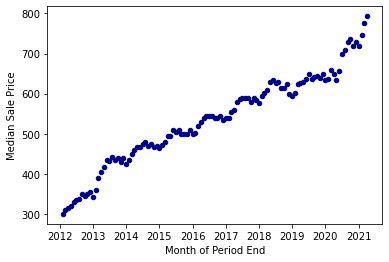

In [6]:
#plotting the figure Median sale price over time
fig= housing_data.plot.scatter( x= 'Month of Period End', y='Median Sale Price', color = 'DarkBlue').get_figure()
fig.savefig('Output/Median sale price over the years.png')


In [7]:

a= housing_data.resample('Y', on='Month of Period End')['Median Sale Price'].mean()
type(a.values)
a.dtype

dtype('float64')

In [8]:
import numpy as np
Y = housing_data.resample('Y', on='Month of Period End')['Median Sale Price'].mean()
year = np.arange(2013,2022,1)
year.shape

(9,)

In [9]:
y_increase = Y.pct_change()*100
y_increase

Month of Period End
2012-12-31          NaN
2013-12-31    24.835526
2014-12-31    11.533816
2015-12-31     7.200866
2016-12-31     7.474747
2017-12-31     7.847744
2018-12-31     6.884532
2019-12-31     2.935181
2020-12-31     8.211221
2021-12-31    11.004026
Freq: A-DEC, Name: Median Sale Price, dtype: float64

In [10]:
y_cummulative = y_increase.cumsum().dropna()
y_cummulative.shape

(9,)

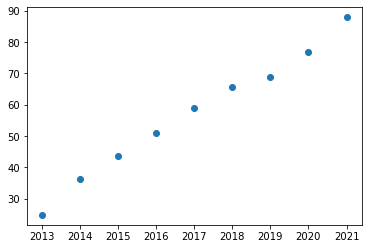

In [11]:
plt.scatter(year,y_cummulative)

In [12]:
(495-414)/414

0.1956521739130435

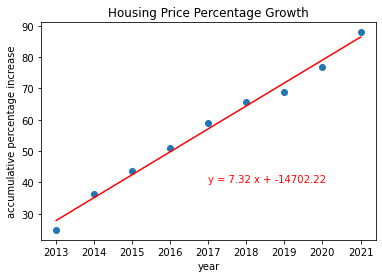

In [13]:
import scipy.stats as st
from scipy.stats import linregress
x = year
y = y_cummulative.fillna(0)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line_value = slope*x + intercept
line_equation = f"y = {(round(slope,2))} x + {(round(intercept, 2))}"
plt.scatter(x, y).get_figure()
plt.plot(x, line_value, color='r')
plt.annotate(line_equation,(2017,40), color='r', fontsize=10)
# plt.legend(line_equation)
plt.xlabel('year')
plt.ylabel('accumulative percentage increase')
plt.title('Housing Price Percentage Growth')

plt.savefig('Output/housing_percentage.png')
plt.show()